In [65]:
import pandas as pd

In [66]:
target = "2024-04-07_18-15-53_brown-lot"
results = pd.read_csv(f'results/target_{target}/transferability.csv')

In [67]:
config_groups = [
    "Surrogate_Data_V1",
    "Surrogate_Data_V2",
    "Surrogate_Data_V3",
    "Surrogate_Data_V4",
    "Surrogate_Data_V5",
]
config_groups_results = []
for config_group in config_groups:
    config_group_results = results[results["config"] == config_group]
    # filter out the results that have a total_samples_count of 400 (from extra tests)
    config_group_results = config_group_results[config_group_results["total_samples_count"] != 400]
    config_groups_results.append(config_group_results["samples_evaded_percentage"].tolist())
print(config_groups_results)

[[0.848816029143898, 0.8431372549019608, 0.8872651356993737, 0.8472998137802608, 0.8604166666666667, 0.8613445378151261], [0.8717948717948718, 0.9421052631578948, 0.9264367816091954, 0.7587253414264037, 0.9018867924528302, 0.965174129353234], [0.925925925925926, 0.8765957446808511, 0.8974358974358975, 0.8523364485981308, 0.8930232558139535, 0.9072978303747534], [0.9256594724220624, 0.9281961471103328, 0.9514767932489452, 0.9644194756554308, 0.9661016949152542, 0.9675675675675676], [0.9714285714285714, 0.9707602339181286, 0.90625, 0.9669421487603306, 0.948339483394834, 0.9613034623217924]]


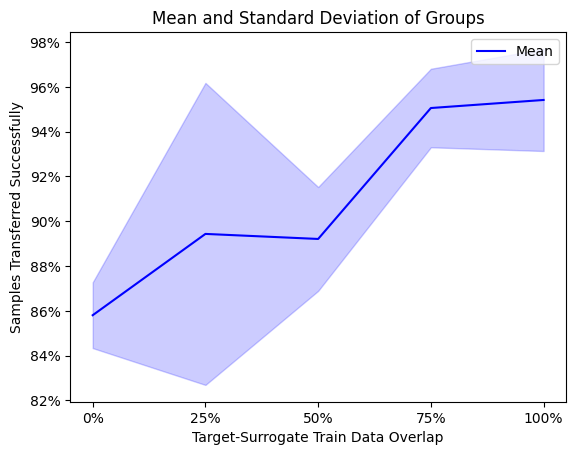

In [68]:
# plot the mean, std of the results with config groups on x-axis and samples_evaded_percentage on y-axis
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

data = np.array(config_groups_results)

means = [np.mean(group) for group in data]
std_devs = [np.std(group) for group in data]

groups = ["0%", "25%", "50%", "75%", "100%"]


plt.plot(groups, means, label="Mean", color="blue")


plt.fill_between(
    groups,
    np.array(means) - np.array(std_devs),
    np.array(means) + np.array(std_devs),
    color="blue",
    alpha=0.2,
)

plt.xlabel("Target-Surrogate Train Data Overlap")
plt.ylabel("Samples Transferred Successfully")
plt.title("Mean and Standard Deviation of Transferability of Surrogate Model Samples to Target Model")
plt.legend()

plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.show()